<a href="https://colab.research.google.com/github/BenMeehan/Exploratory-Data-Analysis/blob/main/CF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset URL**

https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset

https://data.mendeley.com/datasets/c2gw7fy2j4/3

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("dataset_phishing.csv")
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,45.0,-1.0,0.0,1.0,1.0,4.0,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,77.0,5767.0,0.0,0.0,1.0,2.0,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0.0,1.0,2.0,0.0,...,1.0,0.0,0.0,14.0,4004.0,5828815.0,0.0,1.0,0.0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,62.0,-1.0,107721.0,0.0,0.0,3.0,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,224.0,8175.0,8725.0,0.0,0.0,6.0,legitimate


In [3]:
# Replacing the classes with numbers for easier processing

def replaceStatus(data):
    if data == "legitimate":
        return 0
    else: return 1

df["status"] = list(map(replaceStatus,df["status"]))

In [21]:
df=df.fillna(0)

In [22]:
X = df.iloc[:,1:88].values
Y = df.iloc[:,88].values

In [23]:
X

array([[ 37.,  19.,   0., ...,   1.,   1.,   4.],
       [ 77.,  23.,   1., ...,   0.,   1.,   2.],
       [126.,  50.,   1., ...,   0.,   1.,   0.],
       ...,
       [ 33.,  24.,   0., ...,   0.,   0.,   6.],
       [150.,  12.,   1., ...,   1.,   1.,   0.],
       [ 21.,  12.,   0., ...,   0.,   0.,   0.]])

In [24]:
Y

array([0, 1, 1, ..., 0, 1, 1])

In [25]:
# Train - Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=.25,random_state=0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [52]:
# Visualizing the training data using t-SNE

from sklearn.manifold import TSNE
tsne_model=TSNE(n_components=2,random_state=0)

tsne_data=tsne_model.fit_transform(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [53]:
tsne_data = np.vstack((tsne_data.T, y_train)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

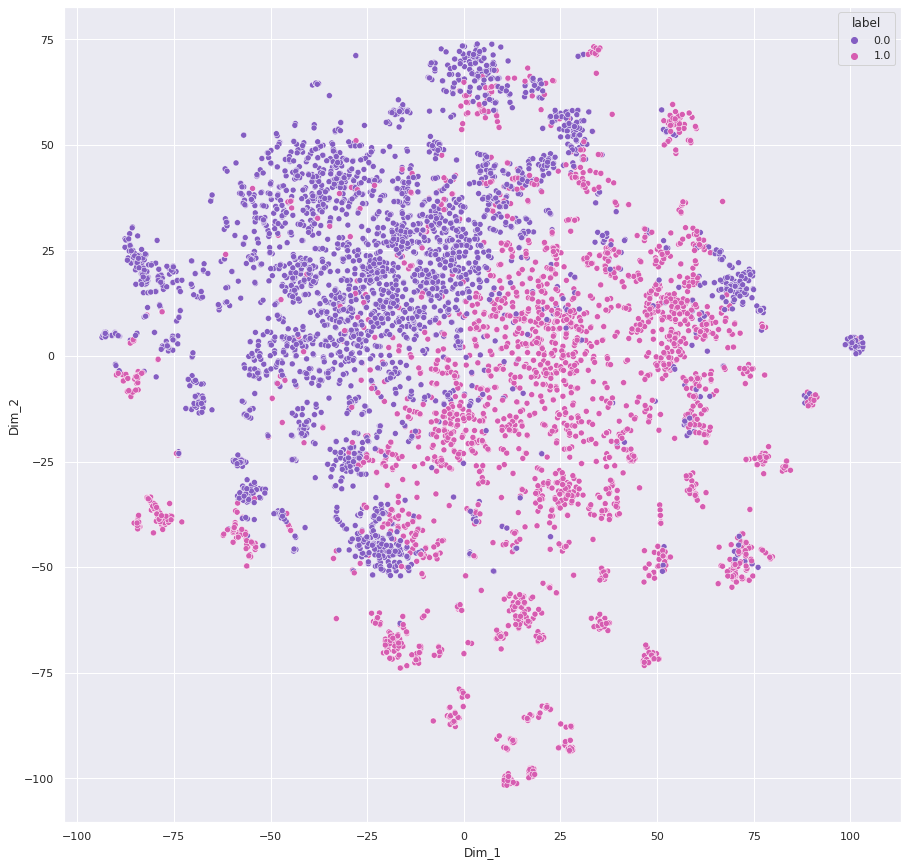

In [56]:
import seaborn as sns
colors=['#845EC2','#D65DB1']
sns.set(rc = {'figure.figsize':(15,15)})
sns.scatterplot(data=tsne_df,x='Dim_1',y="Dim_2",hue="label",palette=colors)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


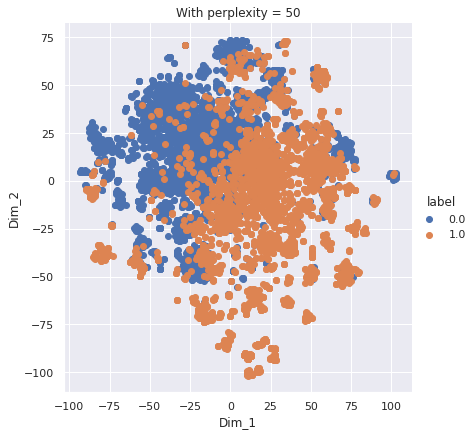

In [57]:
import matplotlib.pyplot as plt
sns.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

# Descision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
dt_classifier = DecisionTreeClassifier(random_state =0)
dt_classifier.fit(x_train,y_train)
y_predict = dt_classifier.predict(x_test)
accuracy_score(y_test,y_predict)

0.9116089613034624

# Random Forests

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10)
rf_classifier.fit(x_train,y_train)
y_pred = rf_classifier.predict(x_test)
accuracy_score(y_test , y_pred)

0.9507128309572301

# K-Nearest Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train,y_train)
y_predict = knn_classifier.predict(x_test)
accuracy_score(y_test , y_predict)

0.935234215885947

# Guassian Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
gnb_classifier = GaussianNB()
gnb_classifier.fit(x_train,y_train)
y_predict = gnb_classifier.predict(x_test)
accuracy_score(y_test , y_predict)

0.49938900203665987

In [62]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state =0).fit(x_train,y_train)
y_predict=logistic_classifier.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.9470468431771895


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [85]:
def results(name, model):
    preds = model.predict(x_test)

    print(name + " score: %.3f" % model.score(x_test, y_test))
    print(classification_report(y_test, preds))
    labels = ['Legitimate', 'Phishing']

    conf_matrix = confusion_matrix(y_test, preds)

    plt.figure(figsize= (10,6))
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap='Reds')
    plt.title("Confusion Matrix for " + name)
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    print("\n\n")

Logistic Regression score: 0.947
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1229
           1       0.95      0.94      0.95      1226

    accuracy                           0.95      2455
   macro avg       0.95      0.95      0.95      2455
weighted avg       0.95      0.95      0.95      2455



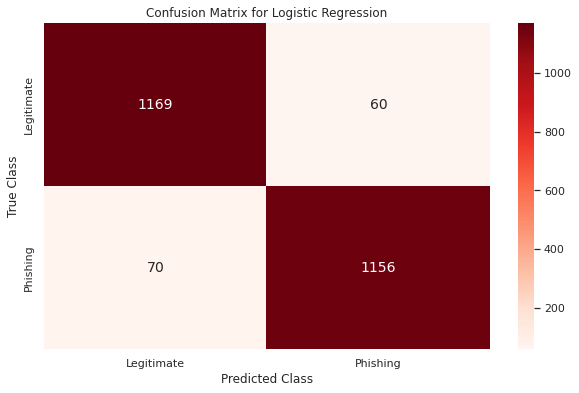




Decision Tree score: 0.912
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1229
           1       0.91      0.91      0.91      1226

    accuracy                           0.91      2455
   macro avg       0.91      0.91      0.91      2455
weighted avg       0.91      0.91      0.91      2455



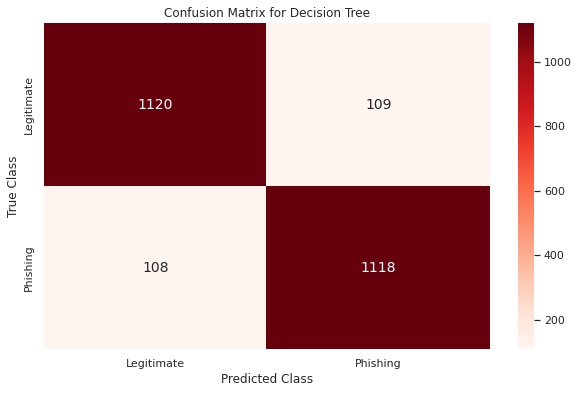




Random Forests score: 0.951
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1229
           1       0.96      0.94      0.95      1226

    accuracy                           0.95      2455
   macro avg       0.95      0.95      0.95      2455
weighted avg       0.95      0.95      0.95      2455



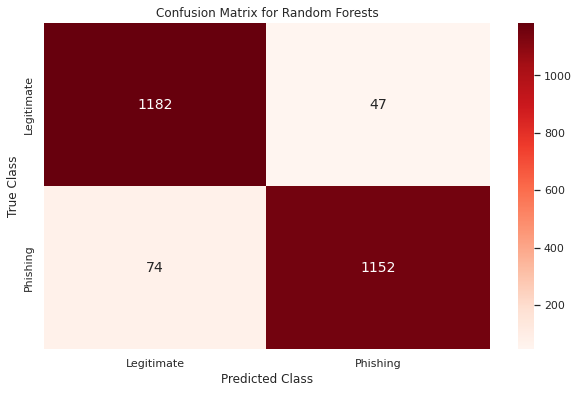




K Nearest Neighbour score: 0.935
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1229
           1       0.95      0.92      0.93      1226

    accuracy                           0.94      2455
   macro avg       0.94      0.94      0.94      2455
weighted avg       0.94      0.94      0.94      2455



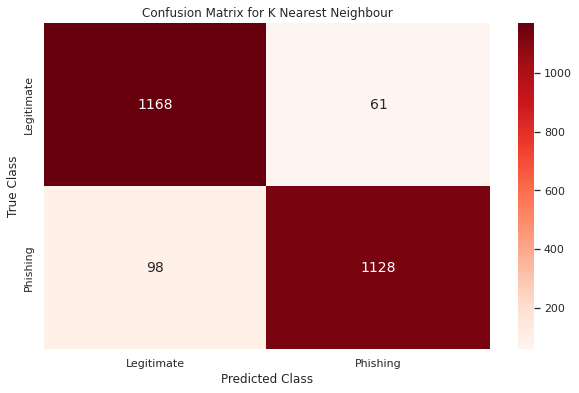




Naive Bayes score: 0.499
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1229
           1       0.50      1.00      0.67      1226

    accuracy                           0.50      2455
   macro avg       0.25      0.50      0.33      2455
weighted avg       0.25      0.50      0.33      2455



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


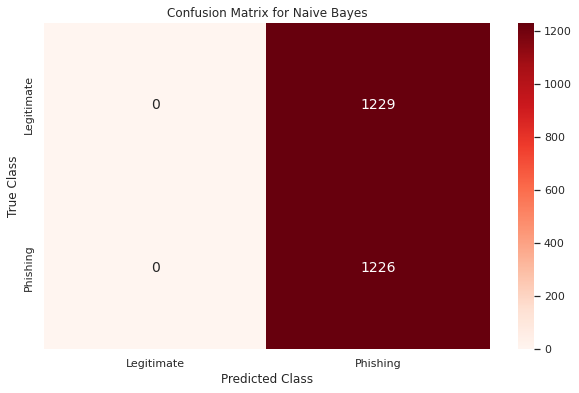

In [87]:
results("Logistic Regression" , logistic_classifier)
results("Decision Tree" , dt_classifier)
results("Random Forests" , rf_classifier)
results("K Nearest Neighbour" , knn_classifier)
results("Naive Bayes" , gnb_classifier)